<p style = "font-size : 40px; color : white ; font-family : 'Bower'; text-align : center; background-color : #053259; border-radius: 5px 5px;"><strong>Employee Attrition Data</strong></p>

<p style = "font-size : 20px; color : white ; font-family : 'Bower'; text-align : center; background-color : #053259; border-radius: 5px 5px;">Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
previntive measures to stop or control the attrition.</p>
<p style = "font-size : 20px; color : white ; font-family : 'Bower'; text-align : left; background-color : #053259; border-radius: 5px 5px;">What Is Attrition?<br>
The term attrition refers to a gradual but deliberate reduction in staff numbers that occurs as employees retire or resign and are not replaced. It is commonly used to describe downsizing in a firm's employee pool by human resources (HR) professionals.</p>


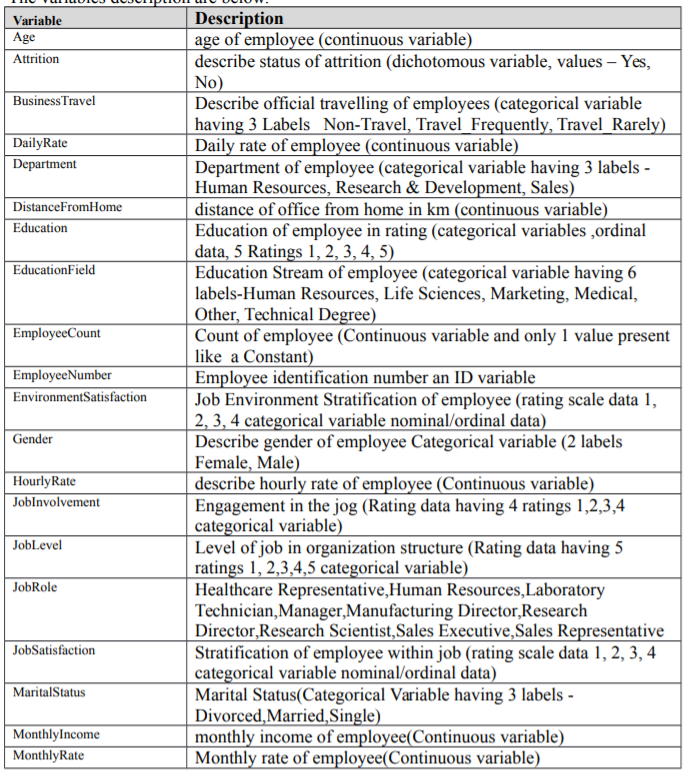

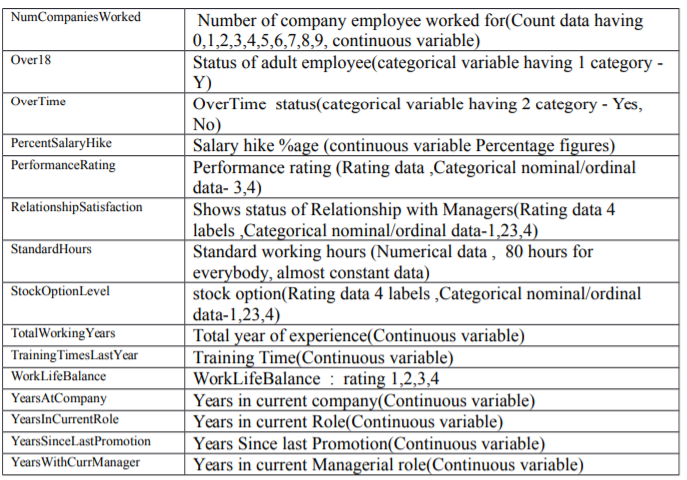


## Quick peak at result
1. [SVM                  , Accuracy on test dataset: 82%](#1)
1. [Logistic Regression  , Accuracy on test dataset: 82%](#2)
1. [Random Forest        , Accuracy on test dataset: 99%](#3)
1. [XGBoost              ,  Accuracy on test dataset: 99%](#4)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/hr-employee-attrition/HR_Employee_Attrition_Data.csv


In [2]:
df= pd.read_csv('/kaggle/input/hr-employee-attrition/HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Creating a palette

In [6]:
blue_pair= sns.color_palette('Paired')[1]
blue_pair_lit= sns.color_palette('Paired')[0]
blue_tone=[ blue_pair, blue_pair_lit]
dark_tone = [blue_pair, 'black']
dark_tone_r = ['black',blue_pair]
dark_tone_3 = [blue_pair_lit, blue_pair, 'black']
blue_pastel= sns.color_palette('Pastel2')[0]
red_pastel =sns.color_palette('Pastel2')[1]
viogo_pastel = sns.color_palette('Pastel2')[2]
green_pastel = sns.color_palette('Pastel2')[4]
yellow_pastel = sns.color_palette('Pastel2')[5]
sns.color_palette('Pastel2')

[(0.7019607843137254, 0.8862745098039215, 0.803921568627451),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9450980392156862, 0.8862745098039215, 0.8),
 (0.8, 0.8, 0.8)]

In [7]:
#### Creating a highlight palette for Attrition
palette_dic ={x: 'black' for x in df.Attrition.unique()}
# print(palette_dic,'\n')
palette_dic['No']= blue_pair #'#24477f'

mckinsey_color_palette = ['#24477f','#D9C666','#BFAE5A','#EA9C39','#053259']


In [8]:
z= sns.blend_palette(['orange', 'white', 'green'])
orange=sns.color_palette(z)[1]

# Visualizing the data

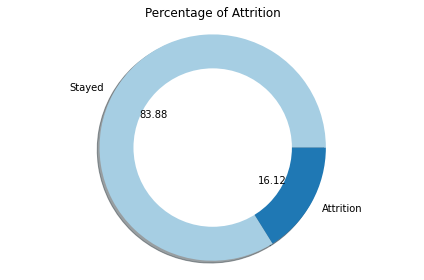

In [9]:
# only "explode" the 2nd slice (i.e. 'Hogs')
# basic pie chart
# df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',explode=explode, shadow=True,title="Gender" ,colors=colors,)
#plt.pie(sizes ,autopct='%.2f',explode=explode, shadow=True,title="Gender" ,colors=colors,)  ## simple pie

sizes =df.groupby('Attrition').size()
explode = (0, 0.1)   ### Split the 2nd category only
colors= sns.color_palette('Paired')[:2]
label= ['Stayed','Attrition']

### Donut chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes ,autopct='%.2f',labels=label, shadow=True,colors=colors)  ## removed explode=explode, startangle=90

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
plt.title('Percentage of Attrition')
plt.tight_layout()
plt.show()


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


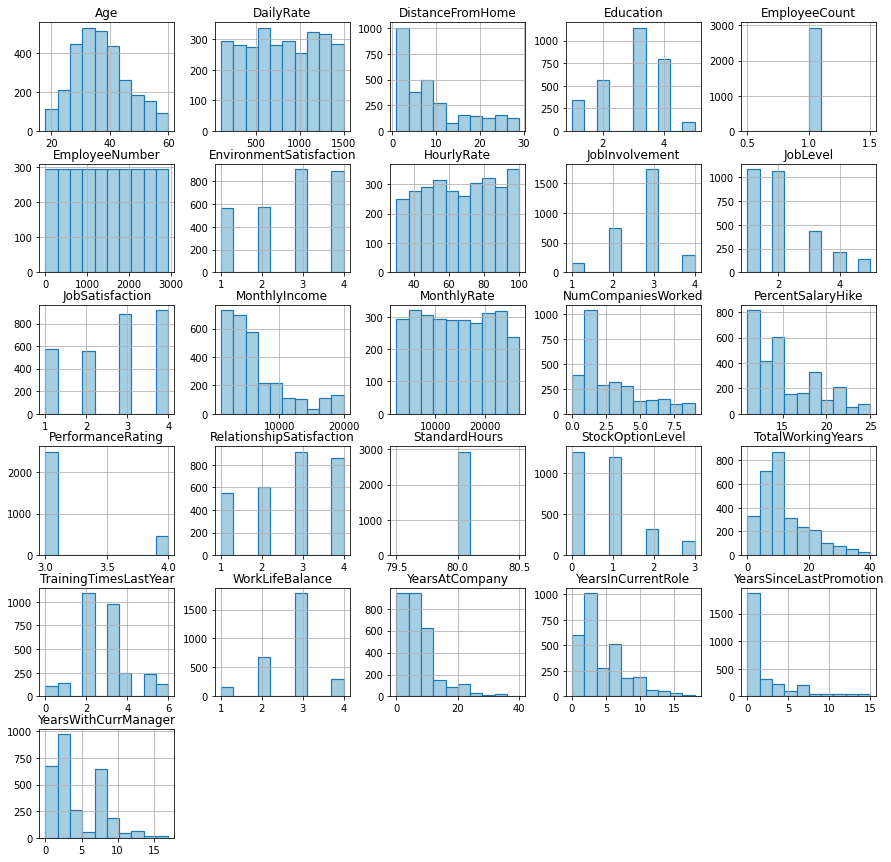

In [10]:
%time
# plt.style.use('dark_background')
df.hist(color=blue_pair_lit,edgecolor=blue_pair, linewidth=1.2, figsize=(15,15));

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


<AxesSubplot:>

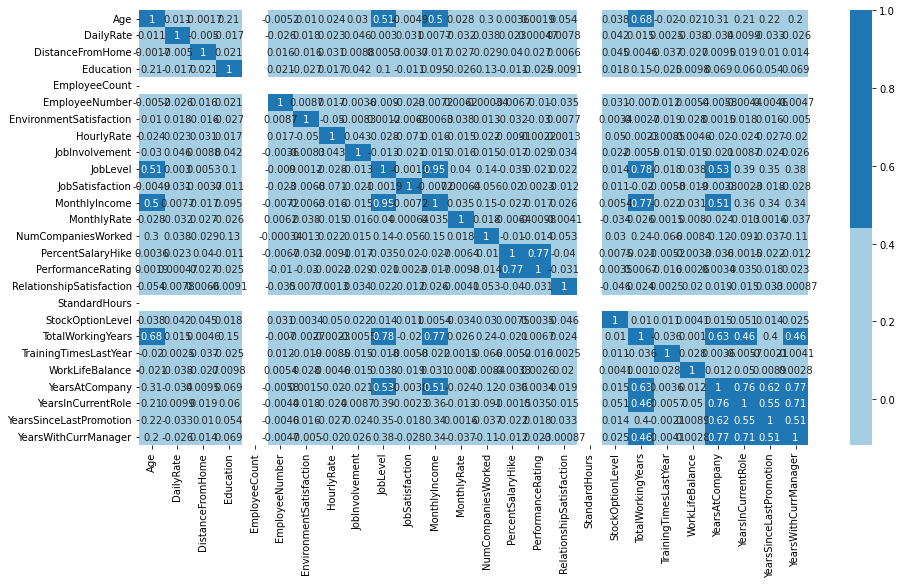

In [11]:
%time
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap=colors, annot=True)

### There is something **strange** in this dataset, I don't see any correlation between dependent variable which I though would be correlated. Lets investigate further

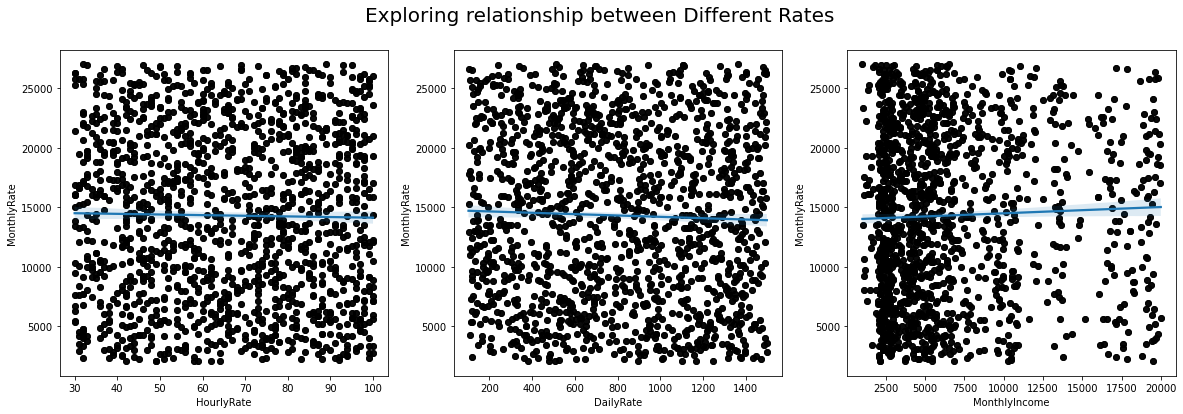

In [12]:
# hfont = {'fontname':'Helvetica'}

### scatter plot between monthly rate, hourly rate and daily rate : Also with monthly income
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.regplot(y='MonthlyRate', x= 'HourlyRate', data=df,scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.subplot(1,3,2)
sns.regplot(y='MonthlyRate', x= 'DailyRate', data=df,scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.subplot(1,3,3)
sns.regplot(y='MonthlyRate', x= 'MonthlyIncome', data=df,scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.suptitle('Exploring relationship between Different Rates', fontsize=20, fontname='Bower')
plt.show();

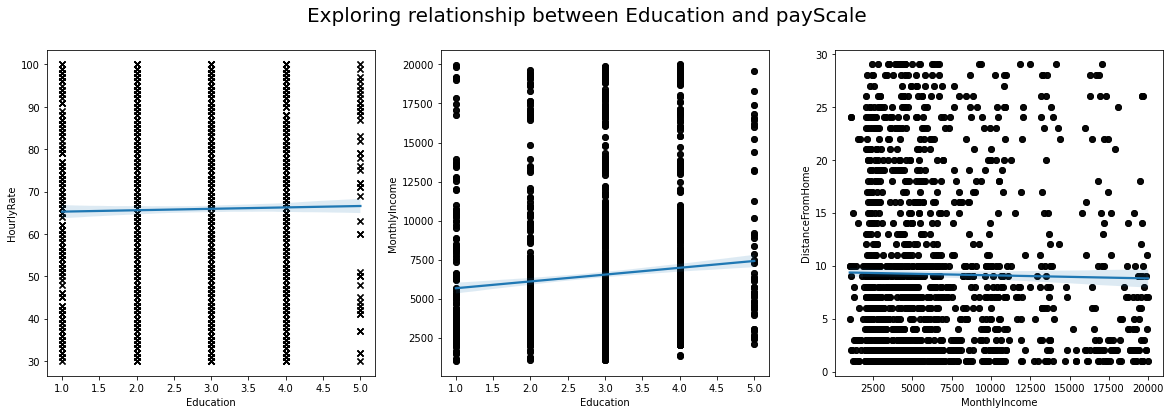

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.regplot(x='Education', y= 'HourlyRate', data=df, color='black', marker='x',scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.subplot(1,3,2)
sns.regplot(x='Education', y= 'MonthlyIncome', data=df,scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.subplot(1,3,3)
sns.regplot(y='DistanceFromHome', x= 'MonthlyIncome', data=df,scatter_kws={"color": "black"}, line_kws={"color": blue_pair})
plt.suptitle('Exploring relationship between Education and payScale', fontsize=20, fontname='sans-serif')
plt.show();

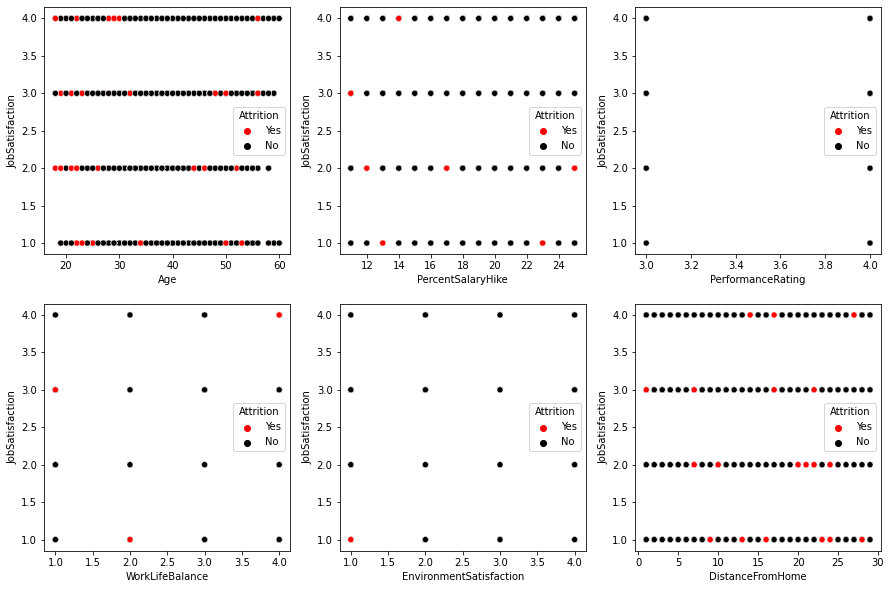

In [14]:
plot_yeam = ['red', 'Black']

m = ["Age","PercentSalaryHike","PerformanceRating","WorkLifeBalance","EnvironmentSatisfaction","DistanceFromHome"]
j=1
plt.figure(figsize=(15,10))
for i in m:
    plt.subplot(2,3,j)
    sns.scatterplot(data=df, x=i, y='JobSatisfaction', hue='Attrition', palette=plot_yeam, sizes=(20, 2000))
    j=j+1
plt.show()
    

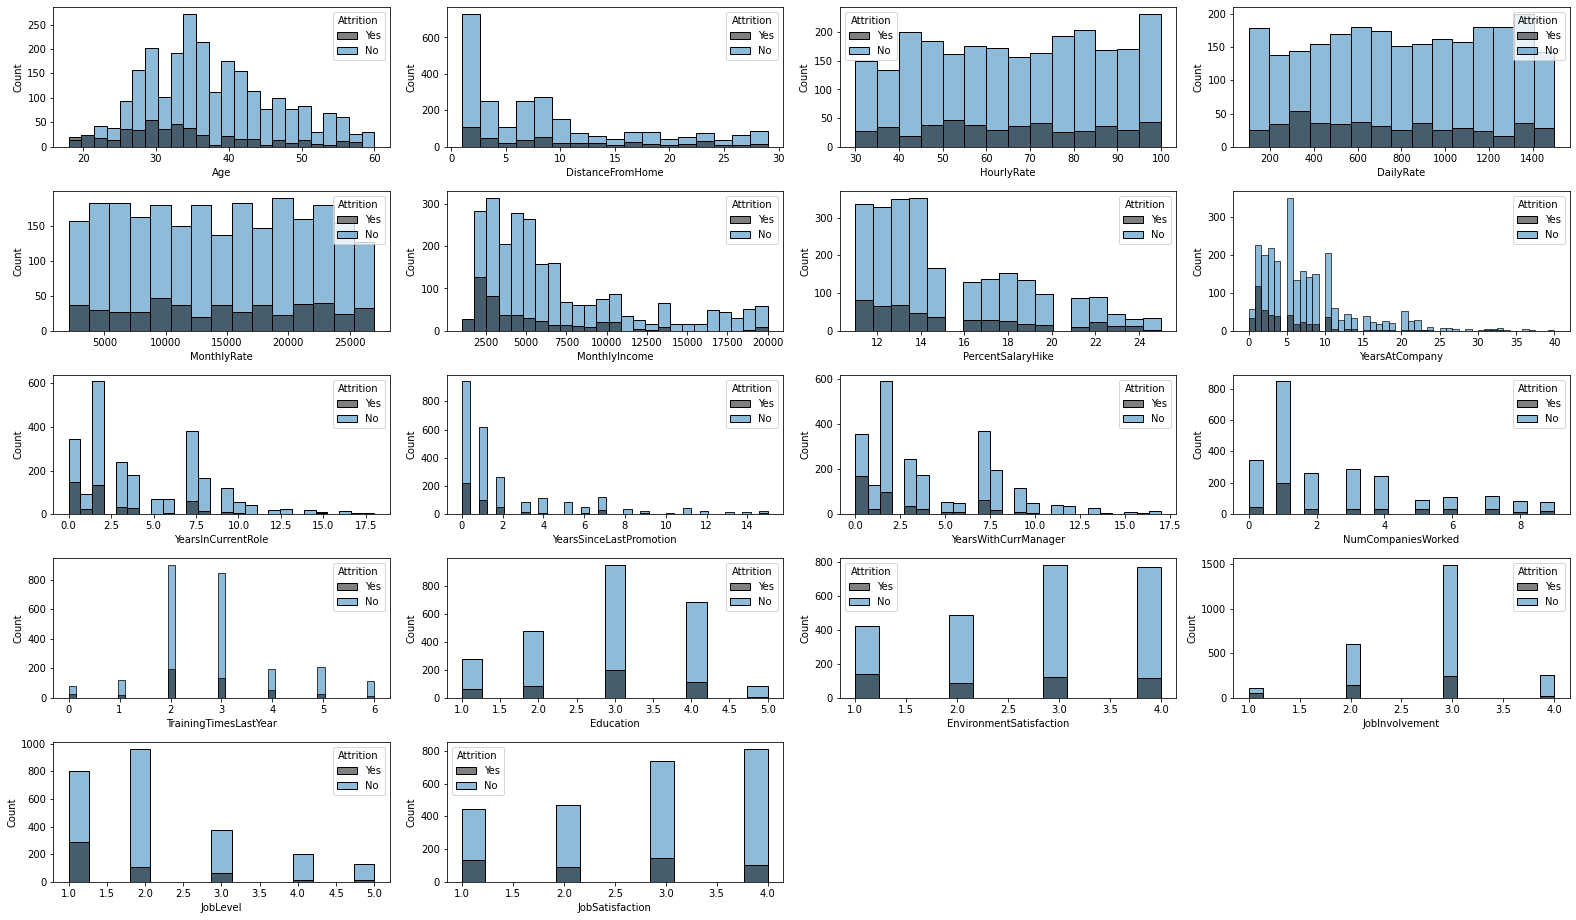

In [15]:
l2=['Age', 'DistanceFromHome', 'HourlyRate','DailyRate', 'MonthlyRate', 'MonthlyIncome','PercentSalaryHike',
    'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager',
    'NumCompaniesWorked', 'TrainingTimesLastYear','Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction']

j=1
plt.figure(figsize=(22,15))
for i in l2:
    plt.subplot(6,4,j)
    sns.histplot(data=df, x=i, palette=dark_tone_r, hue='Attrition')
    j=j+1
    plt.tight_layout()
plt.show()


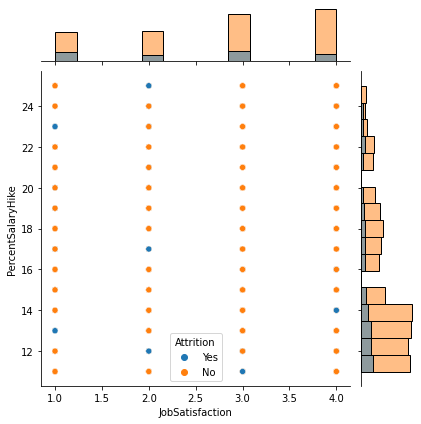

In [16]:
##### Hue don't support kind='reg'
color=[blue_pair, 'Black']
g= sns.JointGrid(data=df, x='JobSatisfaction', y="PercentSalaryHike",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);


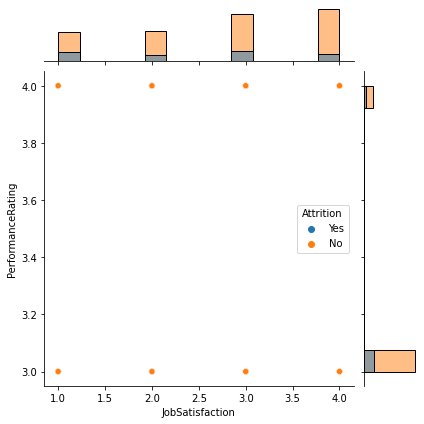

In [17]:
g= sns.JointGrid(data=df, x='JobSatisfaction', y="PerformanceRating",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);

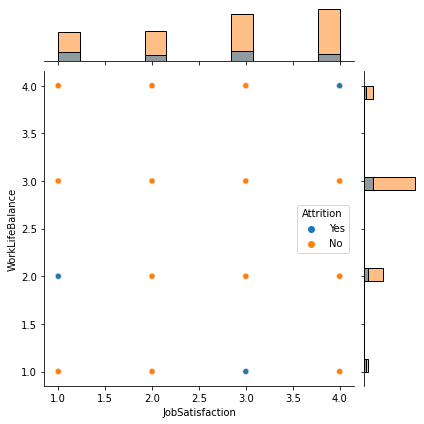

In [18]:
g= sns.JointGrid(data=df, x='JobSatisfaction', y="WorkLifeBalance",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);

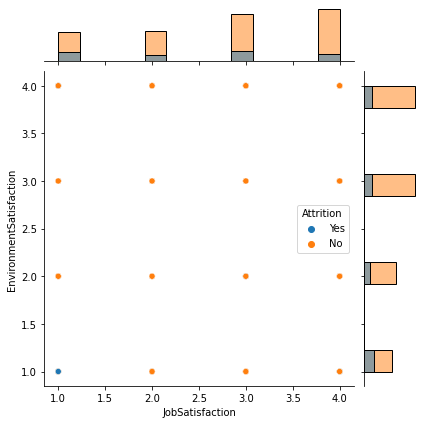

In [19]:
g= sns.JointGrid(data=df, x='JobSatisfaction', y="EnvironmentSatisfaction",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);

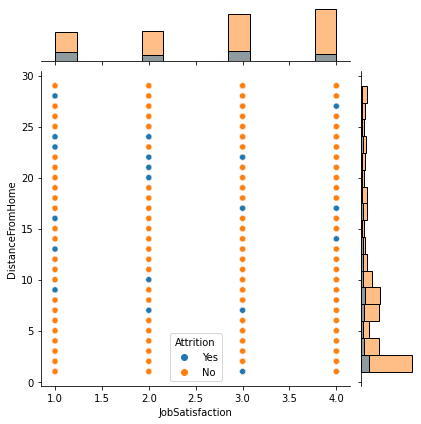

In [20]:
g= sns.JointGrid(data=df, x='JobSatisfaction', y="DistanceFromHome",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);

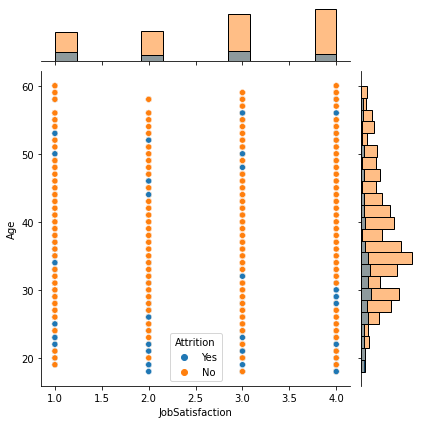

In [21]:
g= sns.JointGrid(data=df, x='JobSatisfaction', y="Age",  hue="Attrition")
g.plot(sns.scatterplot, sns.histplot);

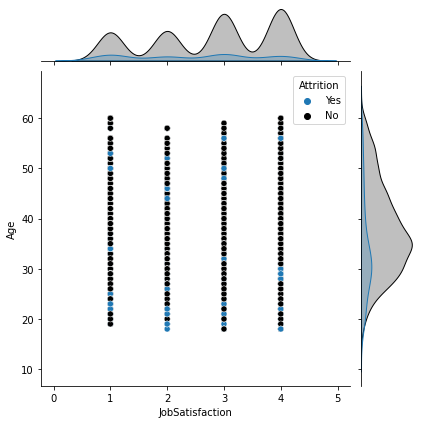

In [22]:
sns.jointplot(data=df, x='JobSatisfaction', y="Age",  hue="Attrition", palette= dark_tone)

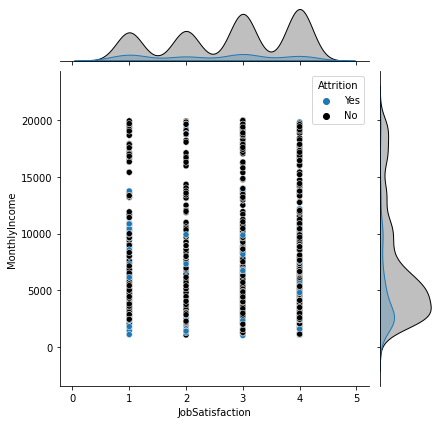

In [23]:
sns.jointplot(data=df, x='JobSatisfaction', y="MonthlyIncome",  hue="Attrition", palette= dark_tone)

# Conclusion after EDA of Numerical data 
1. **Drop following ids**
        1. EmployeeCount > constant i.e. 1
        2. EmployeeNumber > index +1 
        3. Over18 > All employee are 18+
        4. StandardHours > 80hr is constant

In [24]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# 2.2 Catergorical Data Visualisation

In [25]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ''' y = p.get_x() + p.get_width() / 2 - 0.05
        x = p.get_y() + p.get_height()'''
        ax.annotate(percentage, (x, y), size = 12)
    #plt.show()

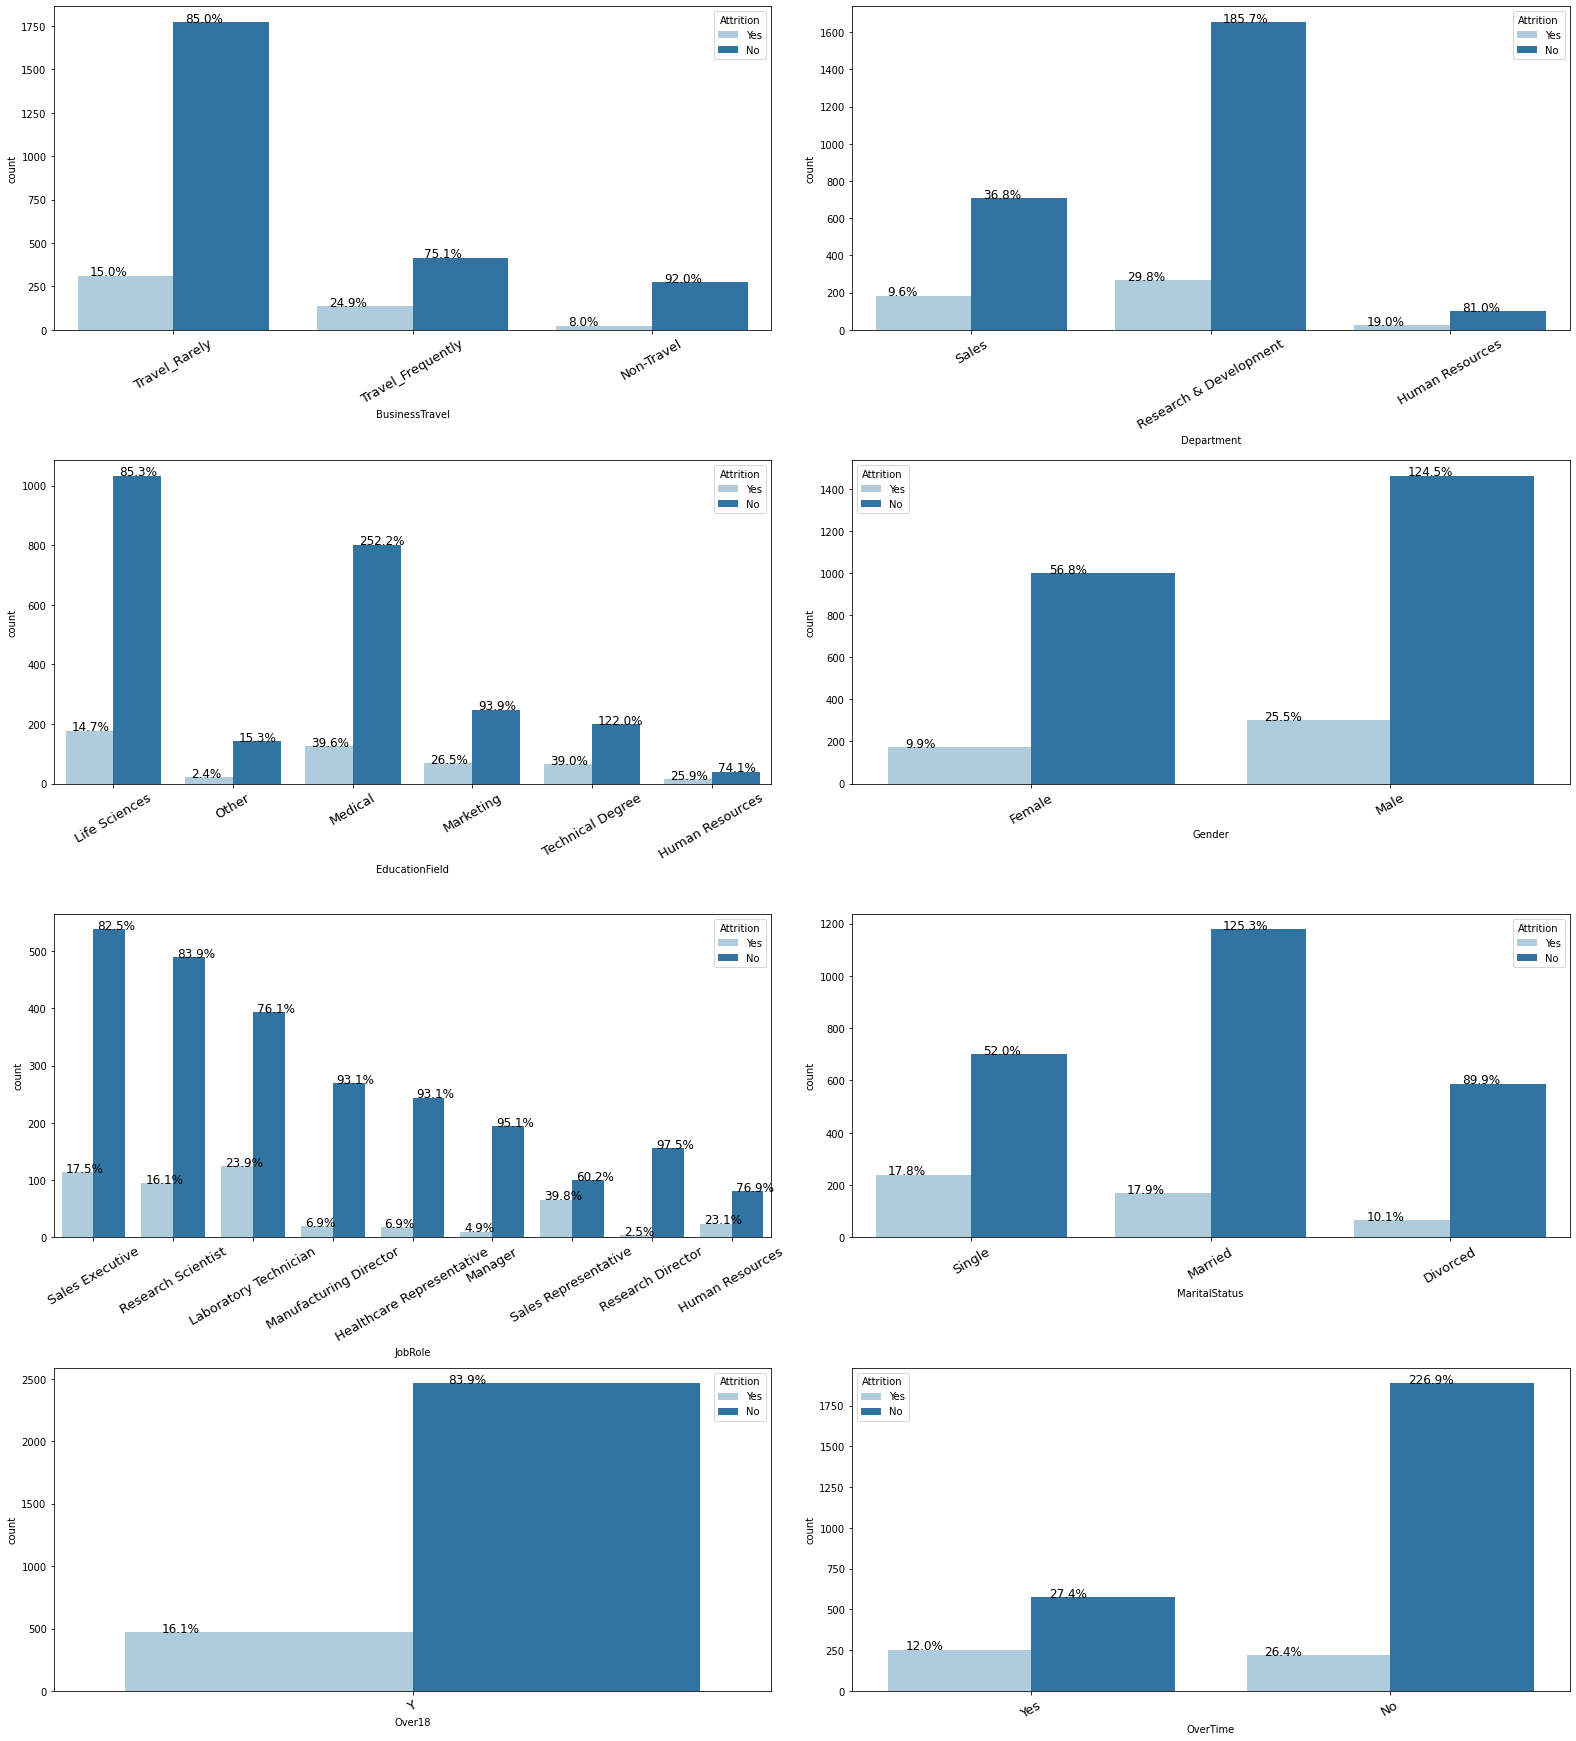

CPU times: user 2.57 s, sys: 286 ms, total: 2.85 s
Wall time: 2.5 s


In [26]:
%%time
catergorical_features= df.select_dtypes(include='object')

##### Defining a function to calculate percentage ######
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    #plt.show()

catergorical_features2 = catergorical_features.drop('Attrition',axis=1)
plt.figure(figsize=(22,30))
j=1
for i in catergorical_features2:
    plt.subplot(5,2,j)
    ax= sns.countplot(x= df[i], data= df,hue='Attrition', palette='Paired')
    plt.xticks(rotation=30, fontsize=13)
    n= df[i].nunique()
    with_hue(ax,df[i],n,2)
    
    j=j+1
plt.tight_layout()
plt.show()

## This is imbalance dataset
Why a data set is imbalance?
> when we look at faliur analysis/defect analysis/success rate etc generally it is skewed as a company would produce defected product due to manufacturing error which is quite low like 1-2% or success of apirant in upsc is 20% who appeared in the mains move to the final stage. 

1. Person working overtime has high chance of Attrition
2. Attrition rate in order Single > Married > divorced ( Reasoning may be Single is more willing to take risk and might have more time when compared to married and divorced as he don't have to split time between family and work. Divorced have least Attrition because they want stability in life and switching job and managing family single handed is tough)


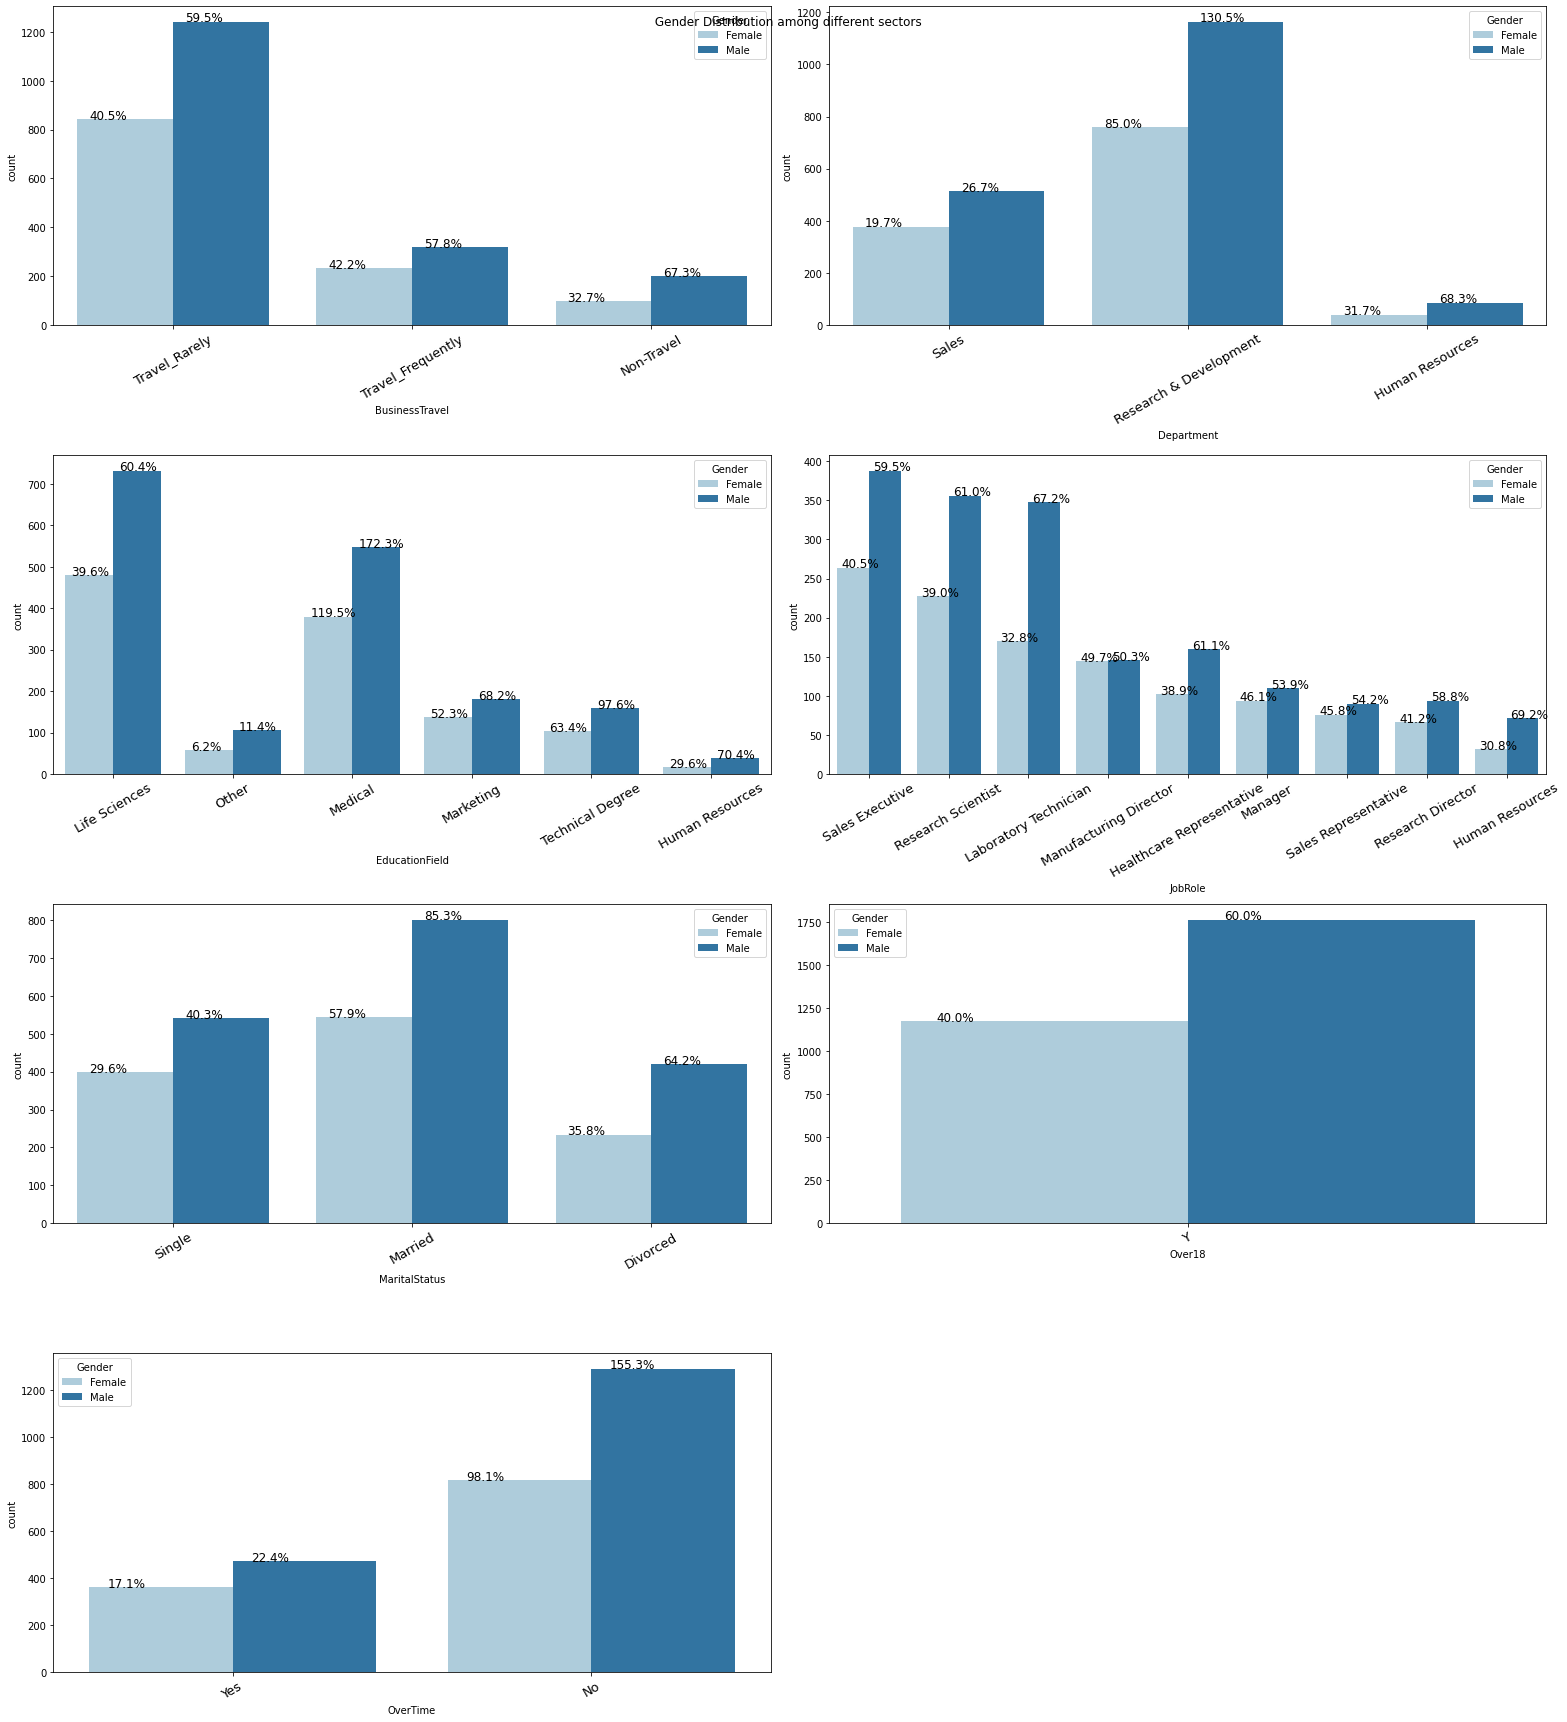

In [27]:
plt.figure(figsize=(22,30))
plt.suptitle(" Gender Distribution among different sectors ")
j=1
for i in catergorical_features2.drop('Gender',axis=1):
    plt.subplot(5,2,j)
    ax= sns.countplot(x= df[i], data= df,hue='Gender', palette='Paired')
    plt.xticks(rotation=30, fontsize=13)
    n= df[i].nunique()
    with_hue(ax,df[i],n,2)
    j=j+1
plt.tight_layout()
plt.show()

### Further analysis of Relationship between Education and EducationFiled

In [28]:
df[df['Education']==2]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,12,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,14,2,Male,93,3,1,Laboratory Technician,4,Divorced,2661,8758,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,36,No,Travel_Frequently,688,Research & Development,4,2,Life Sciences,1,2911,4,Female,97,3,2,Manufacturing Director,2,Divorced,5131,9192,7,Y,No,13,3,2,80,3,18,3,3,4,2,0,2
2914,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2915,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,Y,No,11,3,4,80,1,14,4,1,10,9,9,8
2921,38,No,Travel_Rarely,345,Sales,10,2,Life Sciences,1,2922,1,Female,100,3,2,Sales Executive,4,Married,5343,5982,1,Y,No,11,3,3,80,1,10,1,3,10,7,1,9
2929,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2930,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [29]:
### Relationship between Education and Education field
print(df.Education.unique(),'Total no of unique values :',df.Education.nunique(), '\n')
print(df.EducationField.unique(),'Total no of unique values :',df.EducationField.nunique(),'\n')

df[df['EducationField']=='Other']

[2 1 4 3 5] Total no of unique values : 5 

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] Total no of unique values : 6 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
20,24,No,Non-Travel,673,Research & Development,11,2,Other,1,21,1,Female,96,4,2,Manufacturing Director,3,Divorced,4011,8232,0,Y,No,18,3,4,80,1,5,5,2,4,2,1,3
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,26,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
31,44,No,Travel_Rarely,1459,Research & Development,10,4,Other,1,32,4,Male,41,3,2,Healthcare Representative,4,Married,6465,19121,2,Y,Yes,13,3,4,80,0,9,5,4,4,2,1,3
40,35,No,Travel_Rarely,464,Research & Development,4,2,Other,1,41,3,Male,75,3,1,Laboratory Technician,4,Divorced,1951,10910,1,Y,No,12,3,3,80,1,1,3,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,23,No,Travel_Rarely,571,Research & Development,12,2,Other,1,2879,4,Male,78,3,1,Laboratory Technician,4,Single,2647,13672,1,Y,No,13,3,3,80,0,5,6,4,5,2,1,4
2883,25,No,Travel_Rarely,977,Research & Development,2,1,Other,1,2884,4,Male,57,3,1,Laboratory Technician,3,Divorced,3977,7298,6,Y,Yes,19,3,3,80,1,7,2,2,2,2,0,2
2903,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2904,1,Female,85,3,2,Sales Executive,3,Divorced,4907,13684,0,Y,Yes,22,4,2,80,1,6,3,2,5,3,0,4
2929,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2930,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


####  Use group by on Education


In [30]:
a=df[df['EducationField']=='Other']
ak= a.groupby('Education')
# to display all froup we can
for edu, edu_df in ak:
    print(edu)
    display(edu_df.head(7))

1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
634,25,No,Travel_Rarely,141,Sales,3,1,Other,1,635,3,Male,98,3,2,Sales Executive,1,Married,4194,14363,1,Y,Yes,18,3,4,80,0,5,3,3,5,3,0,3
663,21,Yes,Travel_Rarely,1427,Research & Development,18,1,Other,1,664,4,Female,65,3,1,Research Scientist,4,Single,2693,8870,1,Y,No,19,3,1,80,0,1,3,2,1,0,0,0
1007,29,Yes,Travel_Frequently,337,Research & Development,14,1,Other,1,1008,3,Female,84,3,3,Healthcare Representative,4,Single,7553,22930,0,Y,Yes,12,3,1,80,0,9,1,3,8,7,7,7
1090,29,No,Travel_Rarely,441,Research & Development,8,1,Other,1,1091,3,Female,39,1,2,Healthcare Representative,1,Married,9715,7288,3,Y,No,13,3,3,80,1,9,3,3,7,7,0,7
1413,25,No,Travel_Rarely,977,Research & Development,2,1,Other,1,1414,4,Male,57,3,1,Laboratory Technician,3,Divorced,3977,7298,6,Y,Yes,19,3,3,80,1,7,2,2,2,2,0,2
2104,25,No,Travel_Rarely,141,Sales,3,1,Other,1,2105,3,Male,98,3,2,Sales Executive,1,Married,4194,14363,1,Y,Yes,18,3,4,80,0,5,3,3,5,3,0,3
2133,21,Yes,Travel_Rarely,1427,Research & Development,18,1,Other,1,2134,4,Female,65,3,1,Research Scientist,4,Single,2693,8870,1,Y,No,19,3,1,80,0,1,3,2,1,0,0,0


2


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
20,24,No,Non-Travel,673,Research & Development,11,2,Other,1,21,1,Female,96,4,2,Manufacturing Director,3,Divorced,4011,8232,0,Y,No,18,3,4,80,1,5,5,2,4,2,1,3
40,35,No,Travel_Rarely,464,Research & Development,4,2,Other,1,41,3,Male,75,3,1,Laboratory Technician,4,Divorced,1951,10910,1,Y,No,12,3,3,80,1,1,3,3,1,0,0,0
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,97,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,Y,No,21,4,1,80,1,4,2,2,3,2,0,2
441,42,No,Travel_Frequently,1474,Research & Development,5,2,Other,1,442,2,Male,97,3,1,Laboratory Technician,3,Married,2093,9260,4,Y,No,17,3,4,80,1,8,4,3,2,2,2,0
476,24,No,Travel_Rarely,823,Research & Development,17,2,Other,1,477,4,Male,94,2,1,Laboratory Technician,2,Married,2127,9100,1,Y,No,21,4,4,80,1,1,2,3,1,0,0,0
483,35,No,Travel_Rarely,538,Research & Development,25,2,Other,1,484,1,Male,54,2,2,Laboratory Technician,4,Single,3681,14004,4,Y,No,14,3,4,80,0,9,3,3,3,2,0,2


3


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,26,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
125,26,No,Travel_Rarely,841,Research & Development,6,3,Other,1,126,3,Female,46,2,1,Research Scientist,2,Married,2368,23300,1,Y,No,19,3,3,80,0,5,3,2,5,4,4,3
222,37,No,Travel_Frequently,663,Research & Development,11,3,Other,1,223,2,Male,47,3,3,Research Director,4,Divorced,12185,10056,1,Y,Yes,14,3,3,80,3,10,1,3,10,8,0,7
244,45,No,Travel_Rarely,252,Research & Development,1,3,Other,1,245,3,Male,70,4,5,Manager,4,Married,19202,15970,0,Y,No,11,3,3,80,1,25,2,3,24,0,1,7
375,49,No,Travel_Rarely,1261,Research & Development,7,3,Other,1,376,2,Male,31,2,3,Healthcare Representative,3,Single,10965,12066,8,Y,No,24,4,3,80,0,26,2,3,5,2,0,0
452,45,No,Travel_Rarely,561,Sales,2,3,Other,1,453,4,Male,61,3,2,Sales Executive,2,Married,4805,16177,0,Y,No,19,3,2,80,1,9,3,4,8,7,3,7
458,40,No,Non-Travel,1094,Sales,28,3,Other,1,459,3,Male,58,1,3,Sales Executive,1,Divorced,10932,11373,3,Y,No,15,3,3,80,1,20,2,3,1,0,0,1


4


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
31,44,No,Travel_Rarely,1459,Research & Development,10,4,Other,1,32,4,Male,41,3,2,Healthcare Representative,4,Married,6465,19121,2,Y,Yes,13,3,4,80,0,9,5,4,4,2,1,3
77,45,No,Travel_Rarely,193,Research & Development,6,4,Other,1,78,4,Male,52,3,3,Research Director,1,Married,13245,15067,4,Y,Yes,14,3,2,80,0,17,3,4,0,0,0,0
103,34,No,Travel_Rarely,665,Research & Development,6,4,Other,1,104,1,Female,41,3,2,Research Scientist,3,Single,4809,12482,1,Y,No,14,3,3,80,0,16,3,3,16,13,2,10
334,45,No,Travel_Rarely,549,Research & Development,8,4,Other,1,335,4,Male,75,3,2,Research Scientist,4,Married,3697,9278,9,Y,No,14,3,1,80,2,12,3,3,10,9,9,8
336,29,Yes,Travel_Rarely,318,Research & Development,8,4,Other,1,337,2,Male,77,1,1,Laboratory Technician,1,Married,2119,4759,1,Y,Yes,11,3,4,80,0,7,4,2,7,7,0,7
356,42,No,Travel_Rarely,1332,Research & Development,2,4,Other,1,357,1,Male,98,2,2,Healthcare Representative,4,Single,6781,17078,3,Y,No,23,4,2,80,0,14,6,3,1,0,0,0
396,43,No,Travel_Rarely,1473,Research & Development,8,4,Other,1,397,3,Female,74,3,2,Healthcare Representative,3,Divorced,4522,2227,4,Y,Yes,14,3,4,80,0,8,3,3,5,2,0,2


5


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
337,29,No,Travel_Rarely,738,Research & Development,9,5,Other,1,338,2,Male,30,2,1,Laboratory Technician,4,Single,3983,7621,0,Y,No,17,3,3,80,0,4,2,3,3,2,2,2
1807,29,No,Travel_Rarely,738,Research & Development,9,5,Other,1,1808,2,Male,30,2,1,Laboratory Technician,4,Single,3983,7621,0,Y,No,17,3,3,80,0,4,2,3,3,2,2,2


### Conclusion
**Education and EducationField are not related at-all**

# Feature Engineering

In [31]:
###### Lets drop unnecessary columns 1st
data = df.drop({"Over18",'EmployeeCount','EmployeeNumber','StandardHours'}, axis=1)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
########################-------- Label Encoding -----------########################
data["Attrition"] = LabelEncoder().fit_transform(data['Attrition'])
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])

In [34]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# Normalization

In [35]:
from imblearn.over_sampling import SMOTE
# But before normalization I need to split the data
cols = list(data.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(data[cols],data["Attrition"])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.25,
                                                 shuffle=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [38]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  3699
Train Label Size :  3699
Test Feature Size :  1233
Test Label Size :  1233


# AutoMl : FLAML (Fast and Lightweight AutoML Library)

In [39]:
'''### Without this pip install flaml wasn't working on my notebook
!pip install delayed
!pip install imbalanced-learn''';

In [40]:
'''#Instal
!pip install flaml

#!pip install flaml[notebook]''';

In [41]:
'''# import AutoML class from flaml package
from flaml import AutoML
automl = AutoML()''';

In [42]:
'''from sklearn.model_selection import train_test_split
from flaml import AutoML 

##initialize an AutoML instance
automl_clf = AutoML()''';

# Modeling

In [43]:
'''!pip install imbalanced-learn
!pip install delayed'''

'!pip install imbalanced-learn\n!pip install delayed'

In [44]:
#from delayed.delay import delayed
from sklearn.svm import SVC
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

<a id=1>

# 1. SVM 

Train Accuracy : 0.81 %
Test Accuracy : 0.80 %


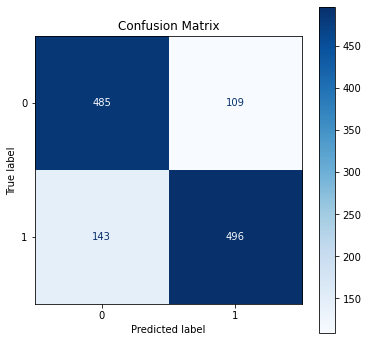

In [45]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

# Predicting the test set results

y_pred = classifier.predict(X_test)

print("Train Accuracy : {:.2f} %".format(accuracy_score(classifier.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(classifier.predict(X_test),Y_test)))

# Making the Confusion Matrix 
cm = confusion_matrix(Y_test, y_pred)

classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax, cmap='Blues')
plt.show()

<a id=2>

# 2. Logistic Regression

Train Accuracy : 0.81 %
Test Accuracy : 0.80 %


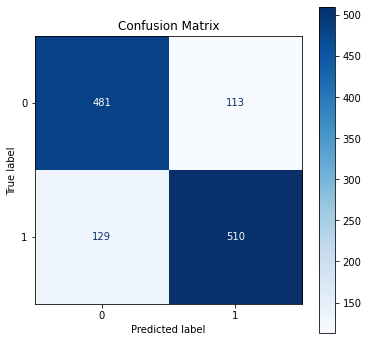

[[481 113]
 [129 510]]


In [46]:
logistic_model = LogisticRegression(solver='liblinear',random_state=7).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax, cmap='Blues')
plt.show()
print(cm)

<a id=3>

# 3. Random Forest

Train Accuracy : 1.00 %
Test Accuracy : 0.98 %


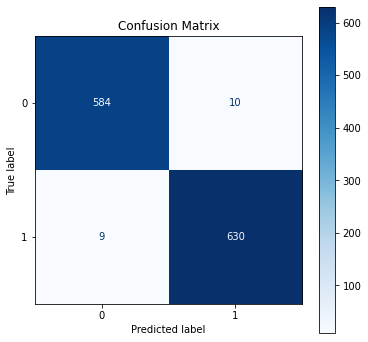

In [47]:
random_forest = RandomForestClassifier(n_estimators=49, random_state=7).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax, cmap='Blues')
plt.show()

<a id=4>

# 4. XGBoost

In [48]:
from xgboost import XGBClassifier

[11:06:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy : 1.00 %
Test Accuracy : 0.99 %


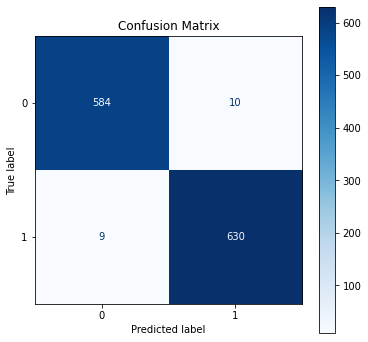

In [49]:
# fit model no training data
xgb = XGBClassifier(n_estimators=750, random_state=7).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(xgb.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(xgb.predict(X_test),Y_test)))

cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax, cmap='Blues')
plt.show()